# Usage: scenario analysis
This is a quick tour of CovsirPhy. Details scenario analysis will be explained.
"Scenario analysis" means that we calculate the number of cases in the future phases with some sets of ODE parameter values. With this analysis, we can estimate the impact of our activities against the outbreak on the number of cases.

## Preparation
Prepare the packages.

In [1]:
# Standard users
# !pip install covsirphy

In [2]:
# Developers (Note: this notebook is in example directory)
import os
os.chdir("../")

In [3]:
import covsirphy as cs
cs.__version__

'2.13.3-iota.new.56.280.420.422.429.449.fix.438.441.450'

## Dataset preparation
Download the datasets to "input" direcotry and load them.  
Please refer to [Usage: datasets](https://lisphilar.github.io/covid19-sir/usage_dataset.html) for the details.

In [4]:
data_loader = cs.DataLoader("input")
# The number of cases (JHU style)
jhu_data = data_loader.jhu(verbose=True)
# Population in each country
population_data = data_loader.population(verbose=True)
# Government Response Tracker (OxCGRT)
oxcgrt_data = data_loader.oxcgrt()

### Start scenario analysis
As an example, we will analysis the number of cases in Japan.

In [5]:
snl = cs.Scenario(jhu_data, population_data, country="Japan", province=None)

### Check records
Let's see the records at first. `Scenario.records()` method return the records as a pandas dataframe and show a line plot. Some kind of complement will be done for analysis, if necessary.

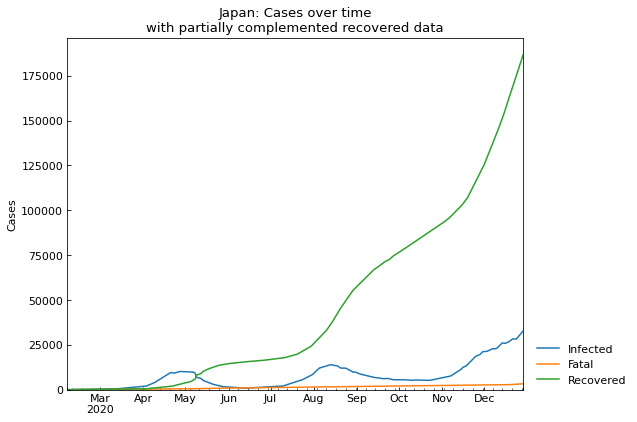

,Date,Infected,Fatal,Recovered
323,2020-12-25,29082,3105,177793
324,2020-12-26,30204,3155,180188
325,2020-12-27,31503,3213,182596
326,2020-12-28,32322,3252,184662
327,2020-12-29,32868,3306,186946


In [6]:
record_df = snl.records()
record_df.tail()

We can calculate the number of daily new cases with `Scenario.record_diff()` method.

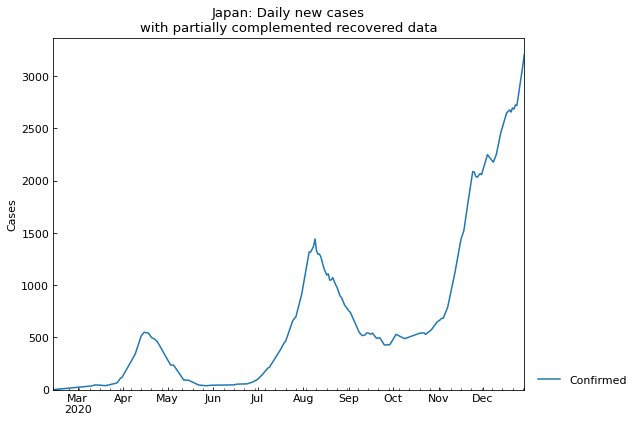

In [7]:
_ = snl.records_diff(variables=["Confirmed"], window=7)

### S-R trend analysis
S-R trend analysis finds the change points of SIR-derived ODE parameters. Details will be explained in [Usage (details: phases)](https://lisphilar.github.io/covid19-sir/usage_phases.html).

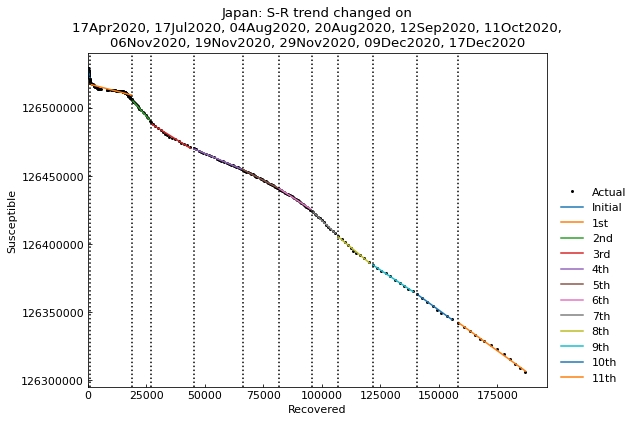

,Type,Start,End,Population
0th,Past,06Feb2020,16Apr2020,126529100
1st,Past,17Apr2020,16Jul2020,126529100
2nd,Past,17Jul2020,03Aug2020,126529100
3rd,Past,04Aug2020,19Aug2020,126529100
4th,Past,20Aug2020,11Sep2020,126529100
5th,Past,12Sep2020,10Oct2020,126529100
6th,Past,11Oct2020,05Nov2020,126529100
7th,Past,06Nov2020,18Nov2020,126529100
8th,Past,19Nov2020,28Nov2020,126529100
9th,Past,29Nov2020,08Dec2020,126529100


In [8]:
# Perform S-R trend analysis and set phases
snl.trend(set_phases=True)
snl.summary()

### Hyperparameter estimation of ODE models
Here, we will estimate the parameter values of SIR-derived models. As an example, we use SIR-F model. Details of models will be explained in [Usage (details: theoritical datasets)](https://lisphilar.github.io/covid19-sir/usage_theoretical.html).

In [9]:
# Estimate the parameter values of SIR-F model
snl.estimate(cs.SIRF)


<SIR-F model: parameter estimation>
Running optimization with 4 CPUs...


	 1st phase (06Feb2020 - 16Apr2020): finished 1364 trials in 3 min 26 sec


	 2nd phase (06Nov2020 - 18Nov2020): finished  324 trials in 0 min 30 sec

	 9th phase (29Nov2020 - 08Dec2020): finished  299 trials in 0 min 30 sec

	10th phase (20Aug2020 - 11Sep2020): finished  497 trials in 0 min 50 sec

	 0th phase (19Nov2020 - 28Nov2020): finished  389 trials in 0 min 40 sec

	 6th phase (17Apr2020 - 16Jul2020): finished 1388 trials in 3 min  1 sec

	 4th phase (04Aug2020 - 19Aug2020): finished 1488 trials in 3 min  1 sec

	11th phase (17Jul2020 - 03Aug2020): finished 1487 trials in 3 min  2 sec

	 7th phase (12Sep2020 - 10Oct2020): finished  197 trials in 0 min 20 sec

	 8th phase (09Dec2020 - 16Dec2020): finished 1582 trials in 3 min  1 sec

	 3rd phase (17Dec2020 - 29Dec2020): finished  817 trials in 1 min 10 sec

	 5th phase (11Oct2020 - 05Nov2020): finished 1779 trials in 3 min  1 sec

Completed optimization. Total: 9 min 31 sec


In [10]:
# Show the sumamry of parameter estimation
snl.summary()

,Type,Start,End,Population,ODE,Rt,theta,kappa,rho,sigma,tau,1/alpha2 [day],alpha1 [-],1/beta [day],1/gamma [day],RMSLE,Trials,Runtime
0th,Past,06Feb2020,16Apr2020,126529100,SIR-F,4.67,0.000626,0.000721,0.034325,0.006628,480,462,0.001,9,50,0.260638,1364,3 min 26 sec
1st,Past,17Apr2020,16Jul2020,126529100,SIR-F,0.56,0.037076,0.000572,0.011149,0.018437,480,582,0.037,29,18,0.364617,1388,3 min 1 sec
2nd,Past,17Jul2020,03Aug2020,126529100,SIR-F,1.96,0.000938,0.000031,0.046499,0.023672,480,10653,0.001,7,14,0.021675,1487,3 min 2 sec
3rd,Past,04Aug2020,19Aug2020,126529100,SIR-F,1.16,0.000594,0.000114,0.029625,0.025357,480,2932,0.001,11,13,0.039752,1488,3 min 1 sec
4th,Past,20Aug2020,11Sep2020,126529100,SIR-F,0.80,0.000583,0.000362,0.025696,0.031786,480,922,0.001,12,10,0.039038,497,0 min 50 sec
5th,Past,12Sep2020,10Oct2020,126529100,SIR-F,0.89,0.003560,0.000301,0.028670,0.031841,480,1106,0.004,11,10,0.021489,197,0 min 20 sec
6th,Past,11Oct2020,05Nov2020,126529100,SIR-F,1.05,0.000410,0.000361,0.037298,0.035219,480,922,0.000,8,9,0.039161,1779,3 min 1 sec
7th,Past,06Nov2020,18Nov2020,126529100,SIR-F,1.66,0.001112,0.000162,0.043659,0.026093,480,2056,0.001,7,12,0.011863,324,0 min 30 sec
8th,Past,19Nov2020,28Nov2020,126529100,SIR-F,1.39,0.000656,0.000284,0.041765,0.029647,480,1174,0.001,7,11,0.036619,389,0 min 40 sec
9th,Past,29Nov2020,08Dec2020,126529100,SIR-F,1.13,0.003342,0.000327,0.034445,0.030079,480,1020,0.003,9,11,0.007534,299,0 min 30 sec


### Accuracy of estimation

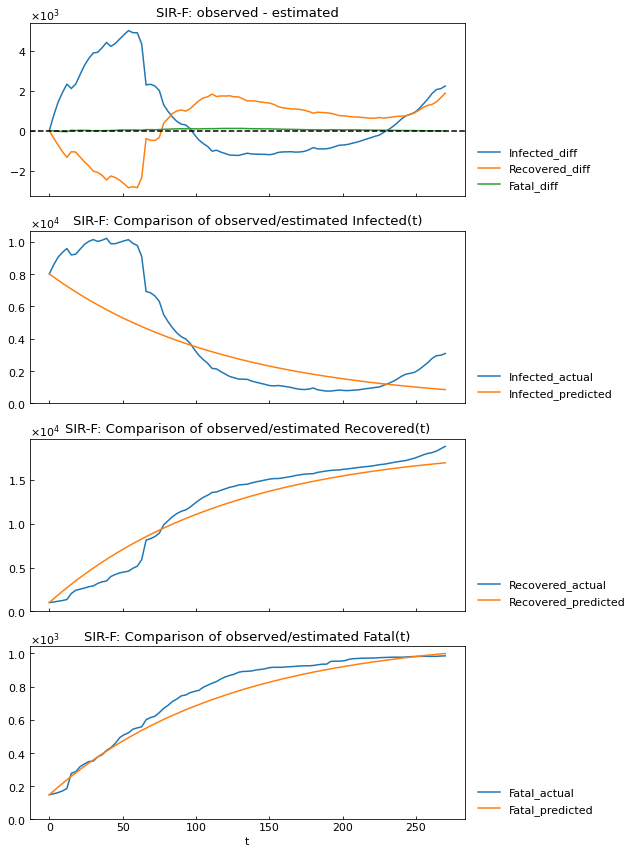

In [11]:
snl.estimate_accuracy(phase="1st")

### Get parameter value
We can get the parameter values of a phase using `Scenario.get()` method.

In [12]:
snl.get("Rt", phase="4th")

0.8

### Show parameter history
`Scenario.history()` method shows the trajectories of parameters (and the number of cases).

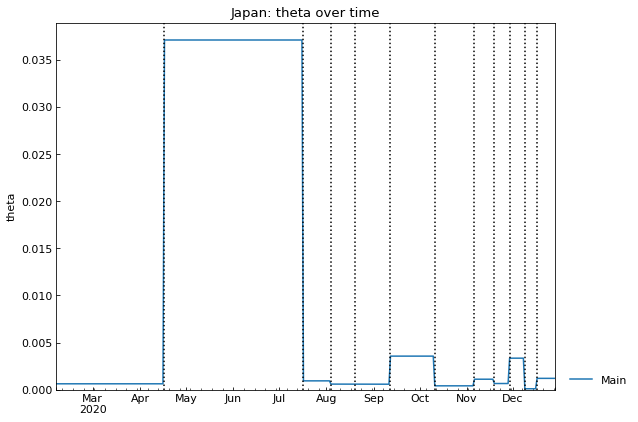

In [13]:
_ = snl.history(target="theta")

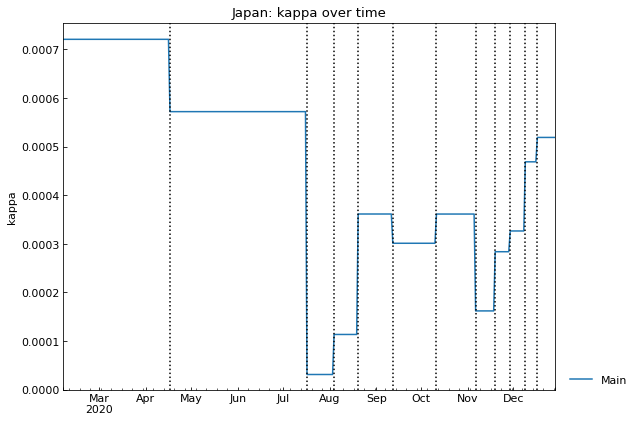

In [14]:
_ = snl.history(target="kappa")

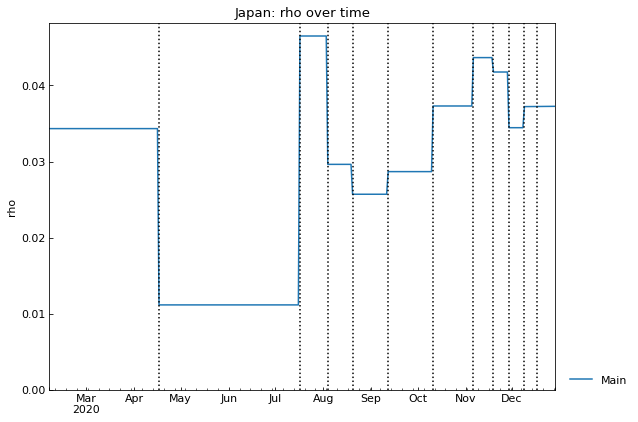

In [15]:
_ = snl.history(target="rho")

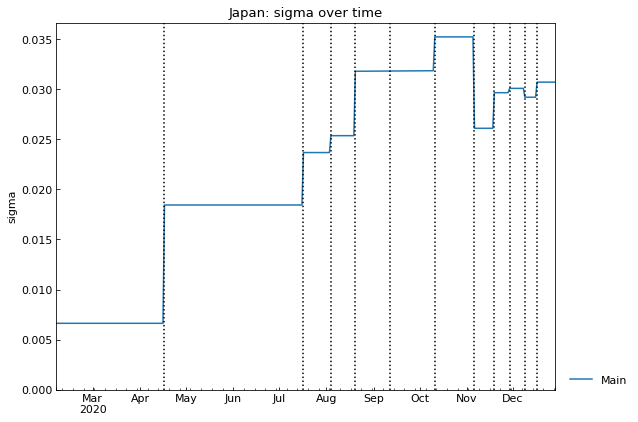

In [16]:
_ = snl.history(target="sigma")

Notes on the history of $\sigma$ value in japan (last updated: 28Dec2020):  
In Japan, we experienced two waves and we are in third wave. In the first wave (Apr - May), recovery period was too long because collapse of the medical care system occurred and no medicines were found.

Sigma values: the first wave < the second wave > the third wave

However, in the second wave (Jul - Oct), recovery period appears short because we have some effective medicines (not approved, in clinical study), yonger people (people un-associated to sever diseases) were infected.

In the third wave (Nov - ), older people tend to be infected and we are facing with medical collapse at this time...

### Show the history of reproduction number
$R_0$ ("R naught") means "the average number of secondary infections caused by an infected host" ([Infection Modeling — Part 1](https://towardsdatascience.com/infection-modeling-part-1-87e74645568a)). When this value is larger than 1, the infection disease is outbreaking.

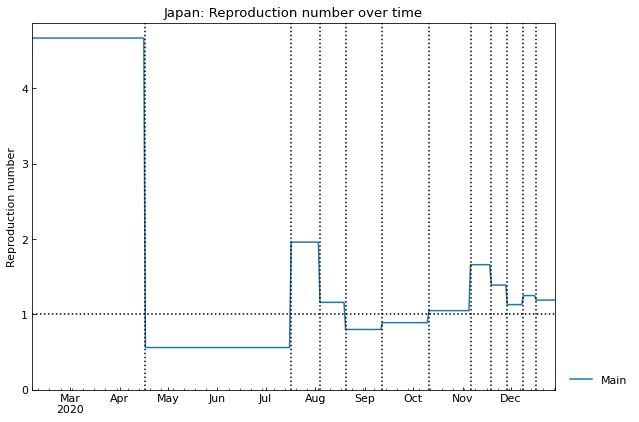

In [17]:
_ = snl.history(target="Rt")

### Simulate the number of cases
We can compare the actual and simulated (with estimated parameter values) number of confirmed/infected/recovered/fatal cases using `Scenario.history()` method.

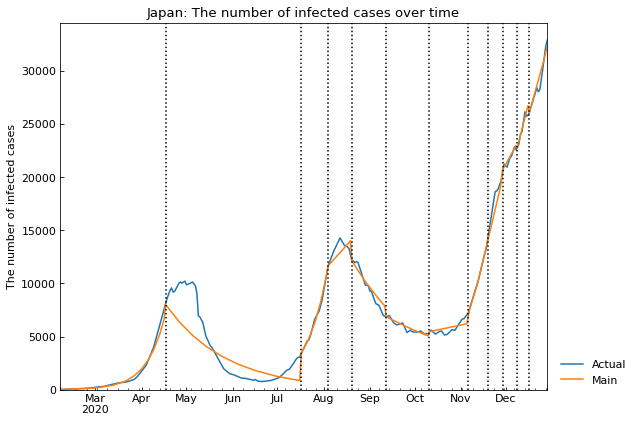

In [18]:
_ = snl.history("Infected")

### Main scenario
If the parameter velues will not be changed until 01Apr2021, how many cases will be? We call this scenario as "Main" scenario.

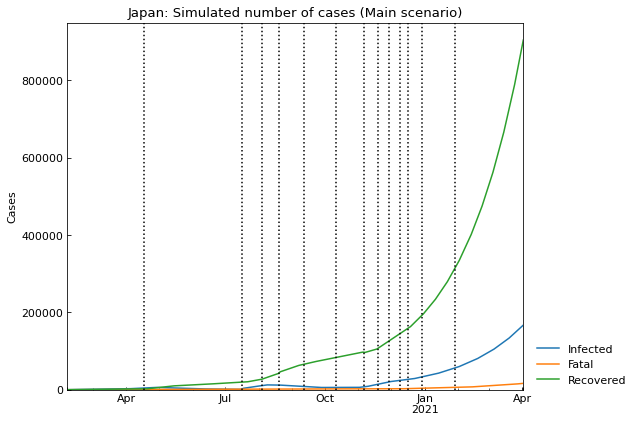

,Date,Confirmed,Fatal,Infected,Recovered
417,2021-03-29,1016151,15343,156031,844777
418,2021-03-30,1033600,15609,158717,859274
419,2021-03-31,1051344,15879,161446,874019
420,2021-04-01,1069392,16155,164219,889018
421,2021-04-02,1087745,16435,167037,904273


In [19]:
# Clear future phases in Main scenario
snl.clear(name="Main")
# Add one future phase 30 days with the parameter set of the last past phase
snl.add(days=30)
# Add one future phase until 01Apr2021 with the same parameter set
snl.add(end_date="01Apr2021", name="Main")
# Simulate the number of cases
snl.simulate(name="Main").tail()

### Simulate another scenario
If $\sigma$ will be double in 30 days, how many cases will be? We will call this scenario as "Medicine" scenario.

In [20]:
# Calcuate the current sigma value of the last phase
sigma_current = snl.get("sigma", name="Main", phase="last")
sigma_current

0.030702035801473508

In [21]:
# Sigma value will be double
sigma_new = sigma_current * 2
sigma_new

0.061404071602947016

In [22]:
# Initialize "Medicine" scenario (with the same past phases as that of Main scenario)
snl.clear(name="Medicine")
# Add 30 days as a new future phases with the same parameter set
snl.add(name="Medicine", days=30, sigma=sigma_current)
# Add a phase until 01Apr2021 with doubled sigma value
snl.add(name="Medicine", end_date="01Apr2021", sigma=sigma_new)
snl.summary()

Type      Start        End  Population    ODE    Rt  \
Scenario Phase                                                          
Main     0th      Past  06Feb2020  16Apr2020   126529100  SIR-F  4.67   
         1st      Past  17Apr2020  16Jul2020   126529100  SIR-F  0.56   
         2nd      Past  17Jul2020  03Aug2020   126529100  SIR-F  1.96   
         3rd      Past  04Aug2020  19Aug2020   126529100  SIR-F  1.16   
         4th      Past  20Aug2020  11Sep2020   126529100  SIR-F  0.80   
         5th      Past  12Sep2020  10Oct2020   126529100  SIR-F  0.89   
         6th      Past  11Oct2020  05Nov2020   126529100  SIR-F  1.05   
         7th      Past  06Nov2020  18Nov2020   126529100  SIR-F  1.66   
         8th      Past  19Nov2020  28Nov2020   126529100  SIR-F  1.39   
         9th      Past  29Nov2020  08Dec2020   126529100  SIR-F  1.13   
         10th     Past  09Dec2020  16Dec2020   126529100  SIR-F  1.25   
         11th     Past  17Dec2020  29Dec2020   126529100  SIR-F  1.19   
         12th   Future  30Dec2020  28Jan2021   126529100  SIR-F  1.19   
         13th   Future  29Jan2021  01Apr2021   126529100  SIR-F  1.19   
Medicine 0th      Past  06Feb2020  16Apr2020   126529100  SIR-F  4.67   
         1st      Past  17Apr2020  16Jul2020   126529100  SIR-F  0.56   
         2nd      Past  17Jul2020  03Aug2020   126529100  SIR-F  1.96   
         3rd      Past  04Aug2020  19Aug2020   126529100  SIR-F  1.16   
         4th      Past  20Aug2020  11Sep2020   126529100  SIR-F  0.80   
         5th      Past  12Sep2020  10Oct2020   126529100  SIR-F  0.89   
         6th      Past  11Oct2020  05Nov2020   126529100  SIR-F  1.05   
         7th      Past  06Nov2020  18Nov2020   126529100  SIR-F  1.66   
         8th      Past  19Nov2020  28Nov2020   126529100  SIR-F  1.39   
         9th      Past  29Nov2020  08Dec2020   126529100  SIR-F  1.13   
         10th     Past  09Dec2020  16Dec2020   126529100  SIR-F  1.25   
         11th     Past  17Dec2020  29Dec2020   126529100  SIR-F  1.19   
         12th   Future  30Dec2020  28Jan2021   126529100  SIR-F  1.19   
         13th   Future  29Jan2021  01Apr2021   126529100  SIR-F  0.60   

                   theta     kappa       rho     sigma  tau  1/alpha2 [day]  \
Scenario Phase                                                                
Main     0th    0.000626  0.000721  0.034325  0.006628  480             462   
         1st    0.037076  0.000572  0.011149  0.018437  480             582   
         2nd    0.000938  0.000031  0.046499  0.023672  480           10653   
         3rd    0.000594  0.000114  0.029625  0.025357  480            2932   
         4th    0.000583  0.000362  0.025696  0.031786  480             922   
         5th    0.003560  0.000301  0.028670  0.031841  480            1106   
         6th    0.000410  0.000361  0.037298  0.035219  480             922   
         7th    0.001112  0.000162  0.043659  0.026093  480            2056   
         8th    0.000656  0.000284  0.041765  0.029647  480            1174   
         9th    0.003342  0.000327  0.034445  0.030079  480            1020   
         10th   0.000099  0.000469  0.037216  0.029196  480             710   
         11th   0.001203  0.000519  0.037255  0.030702  480             642   
         12th   0.001203  0.000519  0.037255  0.030702  480             642   
         13th   0.001203  0.000519  0.037255  0.030702  480             642   
Medicine 0th    0.000626  0.000721  0.034325  0.006628  480             462   
         1st    0.037076  0.000572  0.011149  0.018437  480             582   
         2nd    0.000938  0.000031  0.046499  0.023672  480           10653   
         3rd    0.000594  0.000114  0.029625  0.025357  480            2932   
         4th    0.000583  0.000362  0.025696  0.031786  480             922   
         5th    0.003560  0.000301  0.028670  0.031841  480            1106   
         6th    0.000410  0.000361  0.037298  0.035219  480             922   
         7

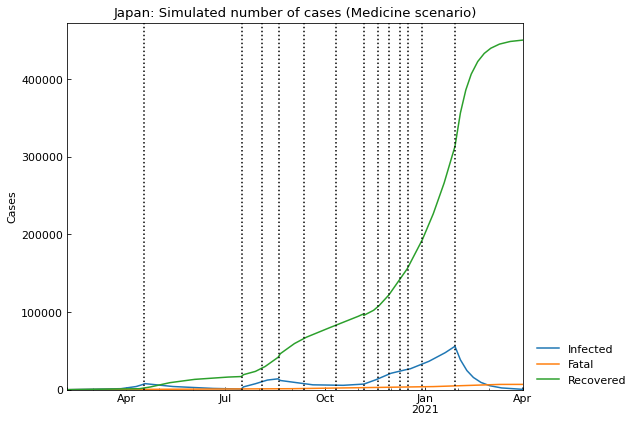

,Date,Confirmed,Fatal,Infected,Recovered
417,2021-03-29,457275,6838,691,449746
418,2021-03-30,457347,6839,641,449867
419,2021-03-31,457416,6840,596,449980
420,2021-04-01,457480,6841,553,450086
421,2021-04-02,457539,6842,513,450184


In [23]:
# Simulate the number of cases
snl.simulate(name="Medicine").tail()

### Short-term prediction of parameter values
With OxCGRT data, we can predict the parameter values of the future phases because [OxCGRT indicators](https://github.com/OxCGRT/covid-policy-tracker) (policy measures) impact on parameter values with delay (=recovery period).  

OxCGRT indicators are

- school_closing,
- workplace_closing,
- cancel_events, 
- gatherings_restrictions",
- transport_closing,
- stay_home_restrictions,
- internal_movement_restrictions,
- international_movement_restrictions,
- information_campaigns,
- testing_policy, and
- contact_tracing.

In [24]:
# Fitting with linear regression model (Elastic Net regression)
fit_dict = snl.fit(oxcgrt_data=oxcgrt_data, name="Forecast")
print(f"Determination coefficient: {fit_dict['score_train']} (train)")
print(f"Determination coefficient: {fit_dict['score_test']} (test)")
print("Intercept:")
fit_dict["intercept"]

Determination coefficient: 0.7674667306702837 (train)
Determination coefficient: 0.7636910426533138 (test)
Intercept:


,School_closing,Workplace_closing,Cancel_events,Gatherings_restrictions,Transport_closing,Stay_home_restrictions,Internal_movement_restrictions,International_movement_restrictions,Information_campaigns,Testing_policy,Contact_tracing
theta,0.002700,0.015777,-0.017661,0.0,0.002638,0.024612,0.015777,0.005446,-0.003278,-0.036457,0.029337
kappa,0.000097,-0.000085,0.000091,0.0,0.000110,-0.000096,-0.000085,-0.000065,0.000046,-0.000382,0.000545
rho,-0.002192,-0.010146,0.011336,0.0,-0.001819,-0.015428,-0.010146,-0.003675,0.002243,0.025006,-0.018742
sigma,-0.005215,0.002059,-0.002912,0.0,-0.000507,0.012648,0.002059,-0.004030,0.003290,0.011697,-0.008434


In [25]:
# Short-term prediction
snl.predict(name="Forecast").summary(name="Forecast")

,Type,Start,End,Population,ODE,Rt,theta,kappa,rho,sigma,tau,1/alpha2 [day],alpha1 [-],1/beta [day],1/gamma [day],RMSLE,Trials,Runtime
0th,Past,06Feb2020,16Apr2020,126529100,SIR-F,4.67,0.000626,0.000721,0.034325,0.006628,480,462,0.001,9,50,0.260638,1364,3 min 26 sec
1st,Past,17Apr2020,16Jul2020,126529100,SIR-F,0.56,0.037076,0.000572,0.011149,0.018437,480,582,0.037,29,18,0.364617,1388,3 min 1 sec
2nd,Past,17Jul2020,03Aug2020,126529100,SIR-F,1.96,0.000938,0.000031,0.046499,0.023672,480,10653,0.001,7,14,0.0216752,1487,3 min 2 sec
3rd,Past,04Aug2020,19Aug2020,126529100,SIR-F,1.16,0.000594,0.000114,0.029625,0.025357,480,2932,0.001,11,13,0.0397522,1488,3 min 1 sec
4th,Past,20Aug2020,11Sep2020,126529100,SIR-F,0.80,0.000583,0.000362,0.025696,0.031786,480,922,0.001,12,10,0.0390381,497,0 min 50 sec
5th,Past,12Sep2020,10Oct2020,126529100,SIR-F,0.89,0.003560,0.000301,0.028670,0.031841,480,1106,0.004,11,10,0.0214895,197,0 min 20 sec
6th,Past,11Oct2020,05Nov2020,126529100,SIR-F,1.05,0.000410,0.000361,0.037298,0.035219,480,922,0.000,8,9,0.0391606,1779,3 min 1 sec
7th,Past,06Nov2020,18Nov2020,126529100,SIR-F,1.66,0.001112,0.000162,0.043659,0.026093,480,2056,0.001,7,12,0.0118625,324,0 min 30 sec
8th,Past,19Nov2020,28Nov2020,126529100,SIR-F,1.39,0.000656,0.000284,0.041765,0.029647,480,1174,0.001,7,11,0.0366185,389,0 min 40 sec
9th,Past,29Nov2020,08Dec2020,126529100,SIR-F,1.13,0.003342,0.000327,0.034445,0.030079,480,1020,0.003,9,11,0.00753352,299,0 min 30 sec


In [26]:
# Or, when you do not need 'fit_dict'
# snl.fit_predict(oxcgrt_data=oxcgrt_data, name="Forecast").summary(name="Forecast")

### Compare the scenarios
We will compare the scenarios with representative values, reproduction number and parameter values.

In [27]:
snl.describe()

,max(Infected),argmax(Infected),Confirmed on 02Apr2021,Infected on 02Apr2021,Fatal on 02Apr2021,Confirmed on 17Jan2021,Infected on 17Jan2021,Fatal on 17Jan2021,13th_Rt
Main,167037,02Apr2021,1087745.0,167037.0,16435.0,NaN,NaN,NaN,1.19
Medicine,55891,29Jan2021,457539.0,513.0,6842.0,NaN,NaN,NaN,0.6
Forecast,44862,17Jan2021,NaN,NaN,NaN,305821.0,44862.0,4627.0,-


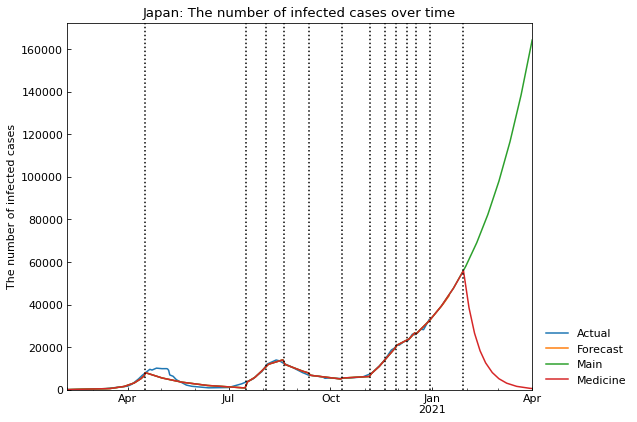

In [28]:
_ = snl.history(target="Infected")

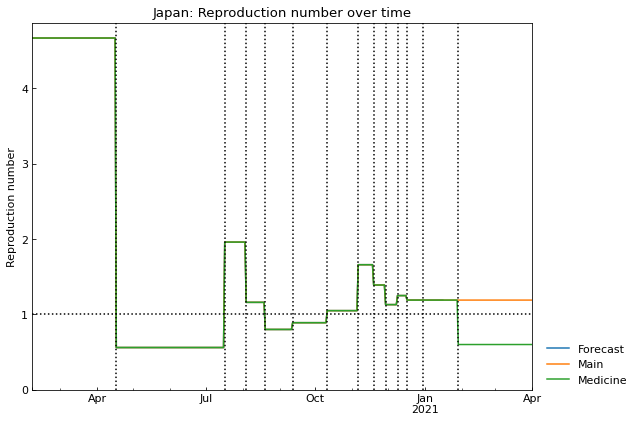

In [29]:
_ = snl.history(target="Rt")

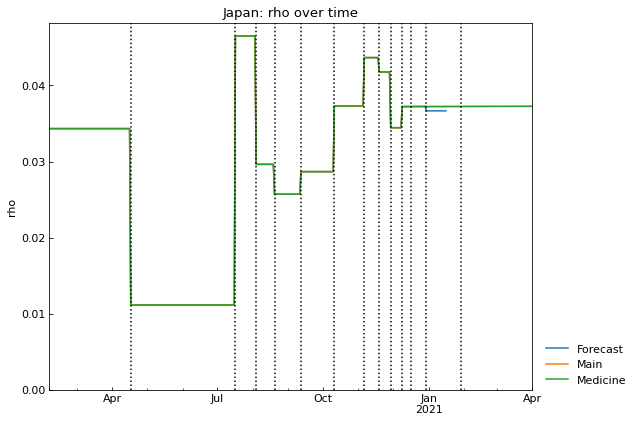

In [30]:
_ = snl.history(target="rho")

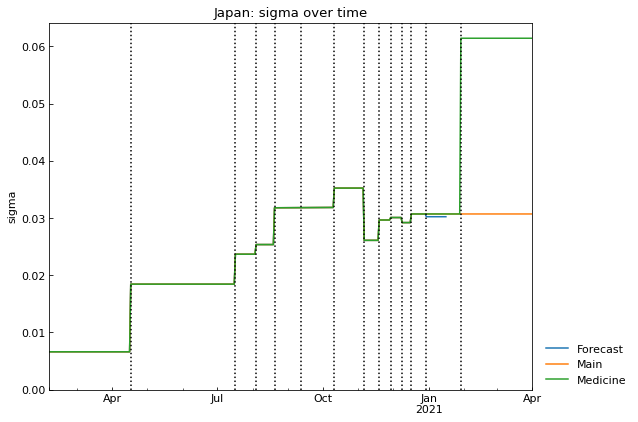

In [31]:
_ = snl.history(target="sigma")

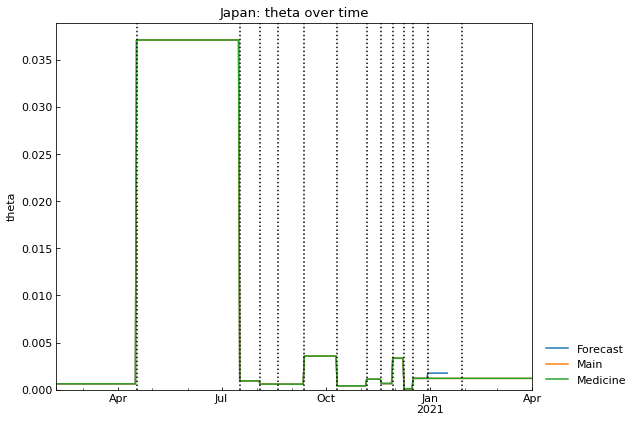

In [32]:
_ = snl.history(target="theta")

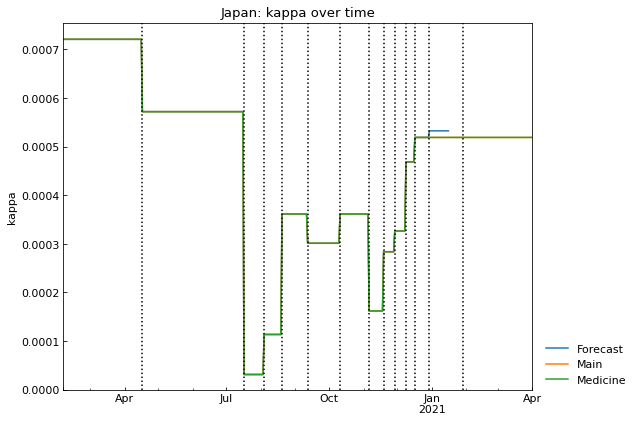

In [33]:
_ = snl.history(target="kappa")

### Change rate of parameters in main scenario
History of each parameter will be shown. Values will be divided by the values in 0th phase.

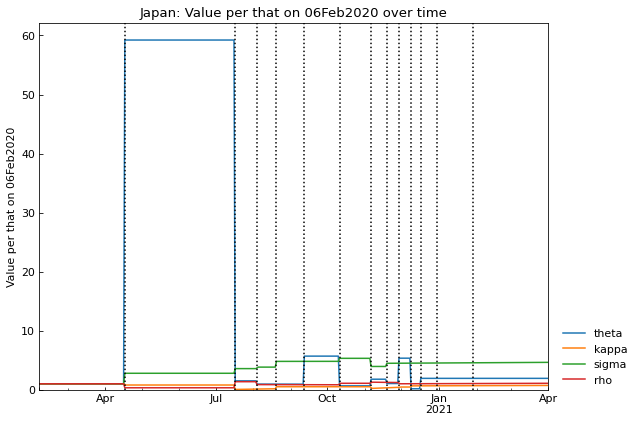

In [34]:
_ = snl.history_rate(name="Main")

## Retrospective analysis
We can evaluate the impact of measures using past records. How many people were infected if the parameter values have not changed sinse 01Sep2020?

In [35]:
# Perform retrospective analysis
snl_retro = cs.Scenario(jhu_data, population_data, "Japan")
snl_retro.retrospective("01Sep2020", model=cs.SIRF, control="Main", target="Retrospective")


<SIR-F model: parameter estimation>
Running optimization with 4 CPUs...


	 1st phase (06Feb2020 - 16Apr2020): finished 1952 trials in 3 min 10 sec


	 8th phase (06Nov2020 - 18Nov2020): finished  366 trials in 0 min 20 sec

	10th phase (29Nov2020 - 08Dec2020): finished  370 trials in 0 min 20 sec

	 2nd phase (20Aug2020 - 31Aug2020): finished  566 trials in 0 min 30 sec

	 9th phase (17Apr2020 - 16Jul2020): finished 2553 trials in 3 min  0 sec

	 0th phase (01Sep2020 - 11Sep2020): finished  219 trials in 0 min 10 sec

	 6th phase (04Aug2020 - 19Aug2020): finished 2629 trials in 3 min  1 sec

	 4th phase (17Jul2020 - 03Aug2020): finished 2635 trials in 3 min  1 sec

	11th phase (19Nov2020 - 28Nov2020): finished 2642 trials in 3 min  1 sec

	 7th phase (12Sep2020 - 10Oct2020): finished  223 trials in 0 min 10 sec

	 3rd phase (17Dec2020 - 29Dec2020): finished  866 trials in 0 min 40 sec

	12th phase (09Dec2020 - 16Dec2020): finished 1762 trials in 1 min 30 sec

	 5th phase (11Oct2020 - 05Nov2020): finished 3117 trials in 3 min  0 sec

Completed optimization. Total: 9 min 33 sec



<SIR-F model: parameter estimation>
Running optimization with 4 CPUs...


	 1st phase (01Sep2020 - 29Dec2020): finished 10359 trials in 3 min  0 sec

Completed optimization. Total: 3 min  0 sec


In [36]:
# Show the summary of estimation
cols = ["Start", "End", "ODE", "Rt", *cs.SIRF.PARAMETERS] + ["RMSLE", "Trials", "Runtime"]
snl_retro.summary(columns=cols)

Start        End    ODE    Rt     theta     kappa  \
Scenario      Phase                                                          
Main          0th    06Feb2020  16Apr2020  SIR-F  4.55  0.000649  0.000795   
              1st    17Apr2020  16Jul2020  SIR-F  0.52  0.098629  0.000099   
              2nd    17Jul2020  03Aug2020  SIR-F  1.95  0.000111  0.000086   
              3rd    04Aug2020  19Aug2020  SIR-F  1.16  0.000594  0.000114   
              4th    20Aug2020  31Aug2020  SIR-F  0.82  0.000413  0.000361   
              5th    01Sep2020  11Sep2020  SIR-F  0.75  0.002565  0.000463   
              6th    12Sep2020  10Oct2020  SIR-F  0.89  0.003560  0.000301   
              7th    11Oct2020  05Nov2020  SIR-F  1.05  0.000410  0.000361   
              8th    06Nov2020  18Nov2020  SIR-F  1.66  0.001112  0.000162   
              9th    19Nov2020  28Nov2020  SIR-F  1.50  0.001576  0.000223   
              10th   29Nov2020  08Dec2020  SIR-F  1.13  0.003342  0.000327   
              11th   09Dec2020  16Dec2020  SIR-F  1.24  0.000305  0.000530   
              12th   17Dec2020  29Dec2020  SIR-F  1.19  0.001203  0.000519   
Retrospective 0th    06Feb2020  16Apr2020  SIR-F  4.55  0.000649  0.000795   
              1st    17Apr2020  16Jul2020  SIR-F  0.52  0.098629  0.000099   
              2nd    17Jul2020  03Aug2020  SIR-F  1.95  0.000111  0.000086   
              3rd    04Aug2020  19Aug2020  SIR-F  1.16  0.000594  0.000114   
              4th    20Aug2020  31Aug2020  SIR-F  0.82  0.000413  0.000361   
              5th    01Sep2020  29Dec2020  SIR-F  0.82  0.000413  0.000361   

                          rho     sigma     RMSLE  Trials       Runtime  
Scenario      Phase                                                      
Main          0th    0.034256  0.006735  0.260283    1952  3 min 10 sec  
              1st    0.010214  0.017631  0.362296    2553  3 min  0 sec  
              2nd    0.046439  0.023678  0.021622    2635  3 min  1 sec  
              3rd    0.029625  0.025357  0.039752    2629  3 min  1 sec  
              4th    0.028308  0.034166  0.019268     566  0 min 30 sec  
              5th    0.023867  0.031294  0.022408     219  0 min 10 sec  
              6th    0.028670  0.031841  0.021489     223  0 min 10 sec  
              7th    0.037298  0.035219  0.039161    3117  3 min  0 sec  
              8th    0.043659  0.026093  0.011863     366  0 min 20 sec  
              9th    0.043682  0.028791  0.025549    2642  3 min  1 sec  
              10th   0.034445  0.030079  0.007534     370  0 min 20 sec  
              11th   0.036871  0.029172  0.010384    1762  1 min 30 sec  
              12th   0.037255  0.030702  0.013353     866  0 min 40 sec  
Retrospective 0th    0.034256  0.006735  0.260283    1952  3 min 10 sec  
              1st    0.010214  0.017631  0.362296    2553  3 min  0 sec  
              2nd    0.046439  0.023678  0.021622    2635  3 min  1 sec  
              3rd    0.029625  0.025357  0.039752    2629  3 min  1 sec  
              4th    0.028308  0.034166  0.019268     566  0 min 30 sec  
              5th    0.028308  0.034166  1.010186   10359  3 min  0 sec

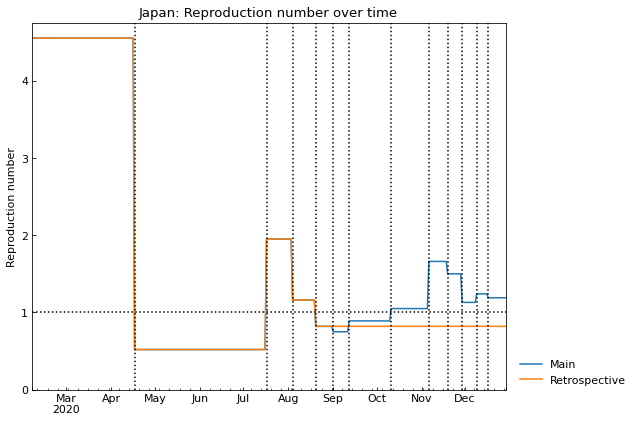

In [37]:
# History of reproduction number
_ = snl_retro.history("Rt")

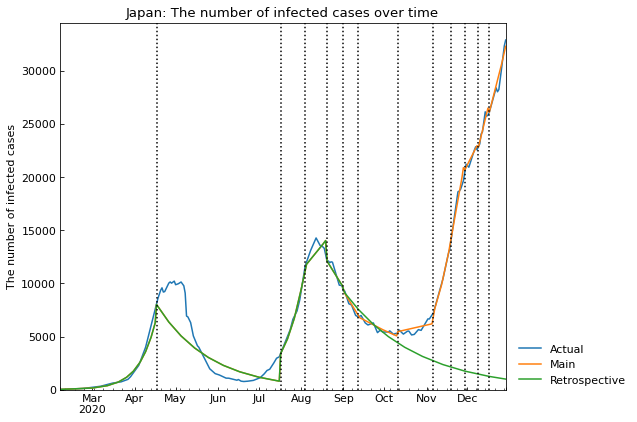

In [38]:
# History of Infected
_ = snl_retro.history("Infected")

In [39]:
# Show the representative values
snl_retro.describe()

,max(Infected),argmax(Infected),Confirmed on 30Dec2020,Infected on 30Dec2020,Fatal on 30Dec2020,5th_Rt,6th_Rt,7th_Rt,8th_Rt,9th_Rt,10th_Rt,11th_Rt,12th_Rt
Main,32859,30Dec2020,229660,32859,3384,0.75,0.89,1.05,1.66,1.5,1.13,1.24,1.19
Retrospective,14020,19Aug2020,105927,979,1791,0.82,-,-,-,-,-,-,-
